In [1]:
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Raw sample data

In [2]:
files = glob("data/samples/*csv")

In [3]:
len(files)

1000

Each file corresponds with samples from a "satellite"

In [4]:
files[:5]

['data/samples/sat907.csv',
 'data/samples/sat913.csv',
 'data/samples/sat720.csv',
 'data/samples/sat734.csv',
 'data/samples/sat708.csv']

In [5]:
df = pd.read_csv(files[0])

In [6]:
df.shape

(1000, 6)

In [7]:
df.head()

,temp_c,battery_charge_pct,altitude,sensor1,sensor2,sensor3
0,-42.19,49.42,739.11,-0.37,-0.47,-0.61
1,-59.58,49.98,1769.63,-0.45,-0.46,-0.59
2,16.13,38.59,1392.36,-0.42,-0.42,-0.70
3,33.84,62.79,694.96,-0.48,-0.61,-0.57
4,-5.02,43.13,1791.50,-0.50,-0.51,-0.68


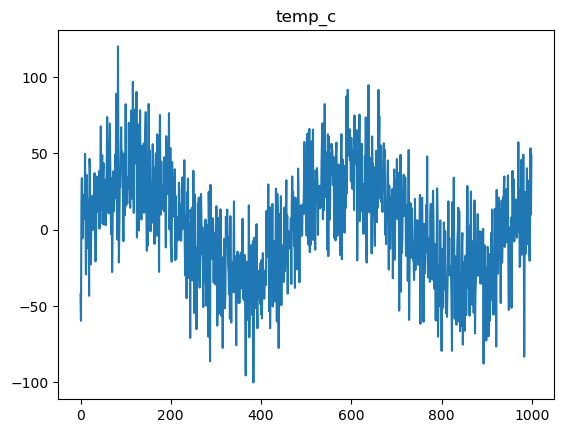

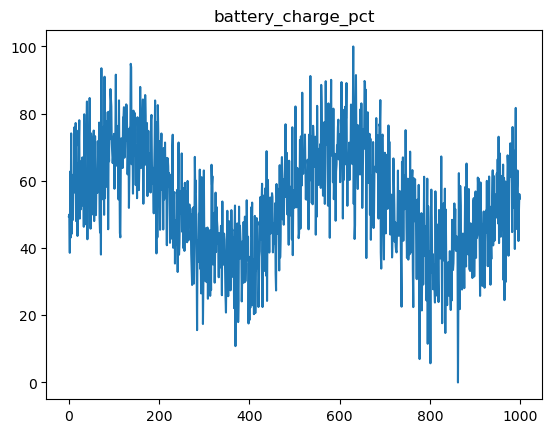

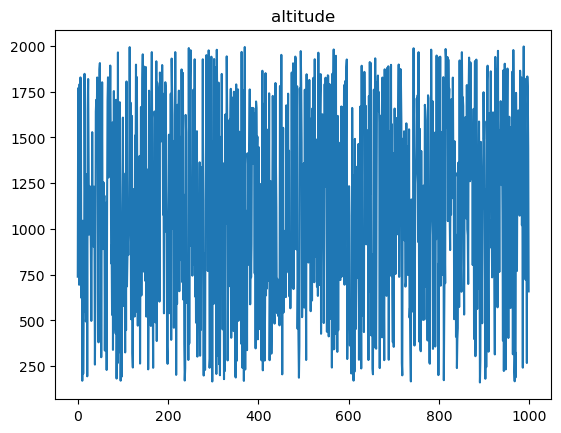

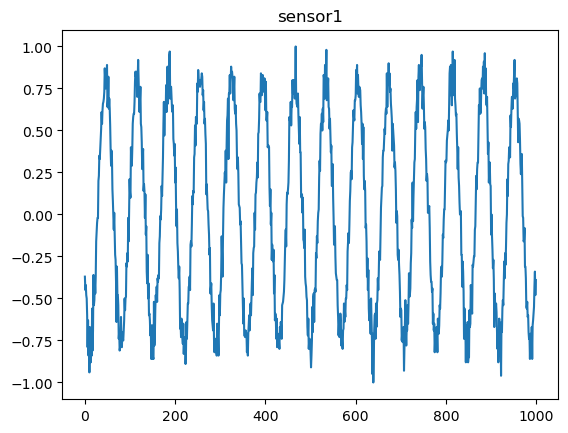

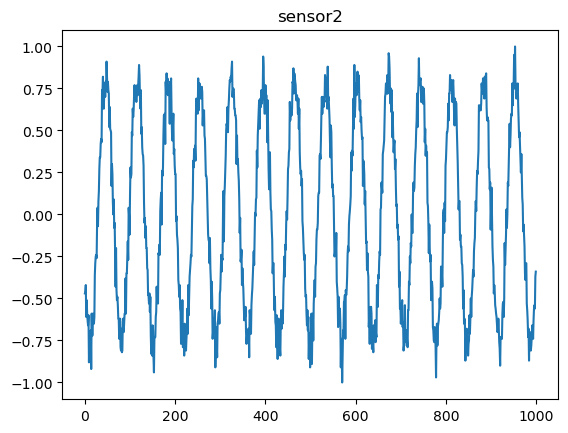

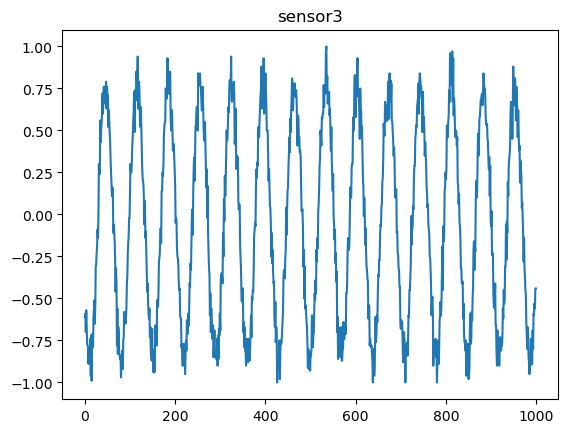

In [8]:
for col in df.columns:
    df[col].plot(title=col)
    plt.show()

# Delta Tables

## satellite-data-raw

You should run the system first to generate the files.

In [9]:
files = glob("./data/delta-tables/satellite-data-raw/*parquet")

In [10]:
len(files)

59

In [11]:
files[:5]

['./data/delta-tables/satellite-data-raw/part-00000-c0a8de5f-6291-4ea2-bed9-87bead1cca01-c000.snappy.parquet',
 './data/delta-tables/satellite-data-raw/part-00000-9a7a50ab-a4a1-4df6-b51b-d974315bd7ef-c000.snappy.parquet',
 './data/delta-tables/satellite-data-raw/part-00000-69a1b104-0b50-4c47-9fba-16a5409f3f61-c000.snappy.parquet',
 './data/delta-tables/satellite-data-raw/part-00000-a37e6676-1518-41bc-bb7c-d1b33ed06497-c000.snappy.parquet',
 './data/delta-tables/satellite-data-raw/part-00000-83994390-fbcd-46ed-a354-ffe7e7013d98-c000.snappy.parquet']

Right now there are many smaller files, in production there would be a periodic process to "optimize" the delta table by aggregating these files in larger ones for more efficient querying.

For now, we can read them in memory and work with the data.

In [12]:
df = pd.read_parquet(files)

In [13]:
df.head()

,satelliteName,timestampNs,tempC,batteryChargePct,altitudeKm,sensor1,sensor2,sensor3,receivedTimestamp
0,sat522,1687929455086871999,7.56,64.89,1694.69,0.41,0.42,0.54,1687929455086
1,sat522,1687929455196300134,49.29,68.03,1240.53,0.53,0.56,0.67,1687929455196
2,sat522,1687929455364611501,37.23,55.94,1042.88,0.52,0.56,0.55,1687929455364
3,sat522,1687929455509911993,70.04,63.28,1228.80,0.64,0.73,0.47,1687929455509
4,sat522,1687929455667232006,18.31,84.87,674.72,0.75,0.74,0.72,1687929455667


In [14]:
df["timestampNs"] = pd.to_datetime(df.timestampNs) # nanoseconds
df["receivedTimestamp"] = pd.to_datetime(df.receivedTimestamp, unit="ms") # milliseconds

In [15]:
df.head()

,satelliteName,timestampNs,tempC,batteryChargePct,altitudeKm,sensor1,sensor2,sensor3,receivedTimestamp
0,sat522,2023-06-28 05:17:35.086871999,7.56,64.89,1694.69,0.41,0.42,0.54,2023-06-28 05:17:35.086
1,sat522,2023-06-28 05:17:35.196300134,49.29,68.03,1240.53,0.53,0.56,0.67,2023-06-28 05:17:35.196
2,sat522,2023-06-28 05:17:35.364611501,37.23,55.94,1042.88,0.52,0.56,0.55,2023-06-28 05:17:35.364
3,sat522,2023-06-28 05:17:35.509911993,70.04,63.28,1228.80,0.64,0.73,0.47,2023-06-28 05:17:35.509
4,sat522,2023-06-28 05:17:35.667232006,18.31,84.87,674.72,0.75,0.74,0.72,2023-06-28 05:17:35.667


In [16]:
df.set_index("receivedTimestamp", inplace=True)
df.sort_index(inplace=True)

In [17]:
df.head()

,satelliteName,timestampNs,tempC,batteryChargePct,altitudeKm,sensor1,sensor2,sensor3
receivedTimestamp,,,,,,,,
2023-06-28 05:17:09.343,sat245,2023-06-28 05:17:09.343403921,12.29,53.73,301.78,-0.70,-0.86,-0.79
2023-06-28 05:17:09.541,sat245,2023-06-28 05:17:09.541804550,24.56,62.74,260.46,-0.80,-0.73,-0.77
2023-06-28 05:17:09.737,sat245,2023-06-28 05:17:09.737097911,37.45,59.09,807.81,-0.70,-0.79,-0.67
2023-06-28 05:17:09.923,sat245,2023-06-28 05:17:09.923527487,19.57,58.99,1505.74,-0.71,-0.68,-0.74
2023-06-28 05:17:10.043,sat245,2023-06-28 05:17:10.043983661,57.27,57.86,1847.46,-0.61,-0.63,-0.61


Now let's resample the data and calculate the mean over the resample window

In [18]:
df_resampled = df.loc[:, df.columns[~df.columns.str.contains("timestampNs")]]\
    .groupby("satelliteName").resample("1min").mean(numeric_only=True)

In [19]:
df_resampled.sort_index().head()

,,tempC,batteryChargePct,altitudeKm,sensor1,sensor2,sensor3
satelliteName,receivedTimestamp,,,,,,
sat137,2023-06-28 05:18:00,23.209474,54.457368,995.681053,-0.684737,-0.735789,-0.697895
sat146,2023-06-28 05:18:00,33.265714,49.861429,1508.017143,-0.541429,-0.534286,-0.658571
sat154,2023-06-28 05:21:00,-6.360000,59.802500,1416.165000,-0.520000,-0.525000,-0.495000
sat16,2023-06-28 05:18:00,8.312857,55.250000,1183.048571,-0.658571,-0.611429,-0.524286
sat174,2023-06-28 05:18:00,17.986667,51.368095,1106.005238,-0.707143,-0.690952,-0.685714
